In [4]:
%pip install pandas scikit-learn numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd

In [17]:
data = pd.read_csv("attributes.tsv", sep='\t')

In [18]:
data

,Object_Id,Text_Value
0,1343152,"<p>Customer is an individual, group of individ..."
1,1343153,<p>Kind of person who is very likely to buy th...
2,1343154,<p>Customer who are loyal to us and repeat the...
3,1343155,<p>The customers who order the product or serv...
4,1343156,<p>Those who only buy or use the offering beca...
...,...,...
2364,1370637,<p>A string of characters that represents an e...
2365,1370638,<p>A string of digits that represents a teleph...
2366,1370639,<p>A string of characters that represents a co...
2367,1370640,<p>A string of characters that represents a da...


In [19]:
import numpy as np
for i, x in enumerate(data['Text_Value']):

    if x is np.nan:
        print(i, x)
        break
    

41 nan


In [5]:
data.take([40, 41, 42])

,Object_Id,Text_Value
40,1343204,<p><!--StartFragment--></p><p>The Documentatio...
41,1343207,NaN
42,1343208,<p>Not all customers are alike. Each customer ...


After inspection of the source, the empty text value for this object ID was parsed as none, and there is a duplicate object with the same ID somewhere else in the file. I have decided to prune the NaN objects.

In [20]:
data = data.dropna()
data.shape

(2367, 2)

# Naive approach
Just use a BoW method to get `TextValue` embeddings, use some kind of lower-dimensional projection and then a clustering algorithm.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

Let's use space-separated words as tokens for tf-idf

In [8]:
tfidf = TfidfVectorizer(min_df=2)
features = tfidf.fit_transform(data['Text_Value'].to_numpy())
features

<2367x2864 sparse matrix of type '<class 'numpy.float64'>'
	with 15678 stored elements in Compressed Sparse Row format>

In [107]:
pca = PCA(n_components=200, random_state=42)
transformed = pca.fit_transform(features.toarray())

In [108]:
pca.explained_variance_ratio_

array([0.03843417, 0.03360225, 0.01976329, 0.01851289, 0.01778748,
       0.01663049, 0.01387687, 0.01190283, 0.0115078 , 0.00855376,
       0.0077095 , 0.00722006, 0.00704256, 0.00675686, 0.00633914,
       0.00632222, 0.00630436, 0.00630436, 0.00617296, 0.00599563,
       0.00583383, 0.0053432 , 0.00531957, 0.00529814, 0.00516289,
       0.00512808, 0.0048898 , 0.00484951, 0.00480326, 0.00462894,
       0.00458211, 0.00439761, 0.00436456, 0.00436456, 0.00436456,
       0.00436456, 0.00436456, 0.00436456, 0.00436456, 0.00436456,
       0.00436456, 0.00428884, 0.00425717, 0.00412432, 0.0040644 ,
       0.00399494, 0.00387961, 0.00387961, 0.00383143, 0.00377579,
       0.00373636, 0.0036382 , 0.00358381, 0.0035621 , 0.0034719 ,
       0.00343069, 0.003392  , 0.00332405, 0.00325327, 0.00310144,
       0.00301481, 0.00299058, 0.00296462, 0.00292357, 0.00291226,
       0.00290971, 0.0029097 , 0.0029097 , 0.0029097 , 0.0029097 ,
       0.0029097 , 0.00290969, 0.00286333, 0.0028509 , 0.00281

In [109]:
sum(pca.explained_variance_ratio_)

0.7116516590278871

The explained variance is not very high, and with a high number of components. This suggests that the transformed data is quite varied, so it will be harder to get a good-fit clustering. The largest principal components also explain only a very small fraction of the data, so there aren't many information-dense features.

In [21]:
from sklearn.mixture import GaussianMixture
import scipy.stats

In [72]:
features.toarray().shape

(2367, 2864)

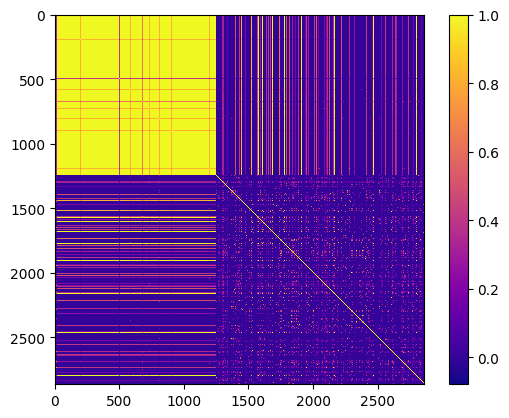

In [110]:
correlation = scipy.stats.spearmanr(features.toarray())
img = plt.imshow(correlation[0], interpolation='none', cmap='plasma')
plt.colorbar(img)

A correlation map of the extracted features suggests that a large fraction of features is highly correlated, which means that they could be removed without greatly affecting the information density of the feature map.

In [90]:
tfidf.get_feature_names_out(features)[:500]

array(['000', '000000', '01', '02', '03', '04', '05', '06', '07', '08',
       '09', '0px', '10', '100', '1000', '1001', '1002', '1003', '1004',
       '1005', '1006', '1007', '1008', '1009', '100px', '101', '1010',
       '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018',
       '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025',
       '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032',
       '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104',
       '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047',
       '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054',
       '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061',
       '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069',
       '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076',
       '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083',
       '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090',
       '109

It seems that the most correlated features are numbers, which are only present in a few examples, and do not hold much information value (other than their presence).

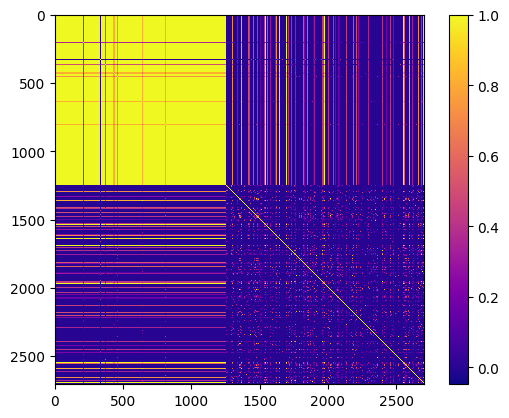

In [111]:
tfidf = TfidfVectorizer(min_df=2, stop_words='english')
features = tfidf.fit_transform(data['Text_Value'].to_numpy())
correlation = scipy.stats.spearmanr(features.toarray())
img = plt.imshow(correlation[0], interpolation='none', cmap='plasma')
plt.colorbar(img)

Removing stop words helped in reducing the dimensionality and correlated-ness of many features, now let's remove the most correlated ones.

In [13]:
def visualize_correlation(data):
    """
    Calculate correlation in the data using Spearman rank correlation, and visualize it using pyplot.
    """
    correlation = scipy.stats.spearmanr(data)
    img = plt.imshow(correlation[0], interpolation='none', cmap='plasma')
    plt.colorbar(img)
    plt.show()
    
def remove_correlated_features(features, tol = 0.95):
    # Make a temp df to drop columns easily
    temp = pd.DataFrame(features)

    # Spearman rank correlation
    correlation = pd.DataFrame(scipy.stats.spearmanr(features)[0])

    # Get the upper triangle and zero the diagonal
    upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

    # Gather features with higher correlation than tol
    to_drop = [col for col in upper.columns if any(upper[col] > tol)]

    temp.drop(to_drop, axis=1, inplace=True)

    return temp.to_numpy()


In [120]:
pruned_features = remove_correlated_features(features.toarray())
pruned_features.shape

(2367, 1286)

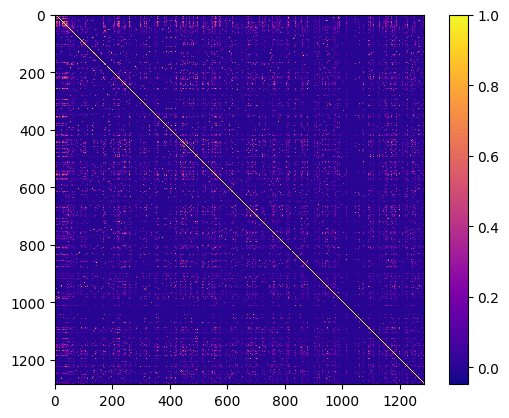

In [124]:
visualize_correlation(pruned_features)

Looks better, let's apply PCA again

In [125]:
transformed = pca.fit_transform(pruned_features)
pca.explained_variance_ratio_

array([0.03919103, 0.03461033, 0.02012546, 0.0185694 , 0.01712001,
       0.01264093, 0.01066301, 0.0093497 , 0.00868912, 0.00851826,
       0.0074344 , 0.00696202, 0.00668066, 0.00658501, 0.00648769,
       0.00648769, 0.00638825, 0.00618533, 0.00596399, 0.00589924,
       0.0057269 , 0.00554301, 0.00546359, 0.00529435, 0.00517853,
       0.00499052, 0.00495861, 0.00476648, 0.00472391, 0.00456136,
       0.00449146, 0.00449146, 0.00449145, 0.00449145, 0.00449145,
       0.00449143, 0.00449142, 0.00449141, 0.00449138, 0.00446539,
       0.00429957, 0.00428077, 0.00423328, 0.00411206, 0.00405541,
       0.00399237, 0.00399229, 0.00396168, 0.00387577, 0.00381295,
       0.00379233, 0.00363956, 0.00360556, 0.00349252, 0.00344289,
       0.00341079, 0.00335414, 0.00334083, 0.00329527, 0.0031689 ,
       0.00311114, 0.00310459, 0.00305099, 0.00303121, 0.00299409,
       0.00299388, 0.00299369, 0.00299361, 0.00299349, 0.00299334,
       0.0029931 , 0.00299253, 0.00297339, 0.00292618, 0.00291

In [126]:
sum(pca.explained_variance_ratio_)

0.7053916203814156

So the explained variance is not improved. The data might simply not be easily separable, or spherical. We will increase the number of components and proceed to clustering

In [131]:
pca = PCA(n_components=450, random_state=42)
transformed = pca.fit_transform(pruned_features)
sum(pca.explained_variance_ratio_)

0.9376847071677126

In [132]:
n_clusters = np.arange(1, 50)
aics = {}
bics = {}
for n in n_clusters:
    gm = GaussianMixture(n_components=n, random_state=42)
    gm.fit(transformed)
    aics[n] = gm.aic(transformed)
    bics[n] = gm.bic(transformed)


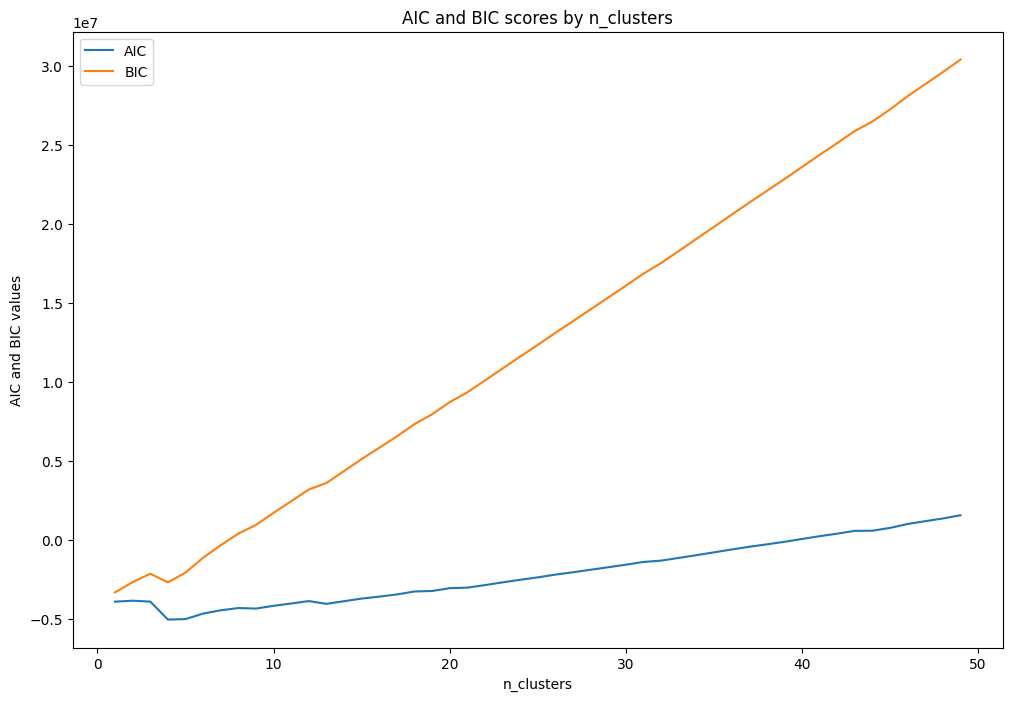

In [136]:
plt.figure(figsize=(12,8))
plt.plot(list(aics.keys()),list(aics.values()), label='AIC')
plt.plot(list(bics.keys()),list(bics.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC scores by n_clusters')
plt.xlabel('n_clusters')
plt.ylabel('AIC and BIC values')
plt.show()

In [137]:
np.argsort(list(aics.values()))

array([ 3,  4,  5,  6,  8,  7,  9, 12, 10,  0,  2, 13, 11,  1, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

In [138]:
np.argsort(list(bics.values()))

array([ 0,  3,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

It seems that the lowest AIC and values are around 4-5 clusters. There is a dip at 4 clusters in the BIC as well, but is actually the smallest for a single value. The relative uncertainty of both these metrics suggsets that the data is indeed hard to decisively cluster (based on the given features).

Perhaps pruning the features may in fact make clustering harder, since the documents with a large number of highly correlated features should probably be in the same cluster. Let's also try clustering without pruning, and using more ngrams. But first, formalize the training procedure so it can be easily reused.

In [52]:
from sklearn.preprocessing import FunctionTransformer
def preprocess(data, prune=False, min_df = 2, max_df=0.99, ngrams = (1, 2), token_type = 'word', n_components=250):
    """
    Handles preprocessing using tf-idf and PCA. Transforms the given data and returns a tuple
    (transformed data, preprocess pipeline)
    """
    
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngrams, analyzer=token_type)),
        ('dense', FunctionTransformer(lambda x : x.toarray())),
    ])

    if prune :
        # Drop highly correlated features
        pipe.steps.append(('drop_correlated', FunctionTransformer(lambda x : remove_correlated_features(x))))

    pipe.steps.append(('pca', PCA(n_components=n_components, random_state=42)))
    features = pipe.fit_transform(data)
    print(f'Explained variance: {sum(pipe.steps[-1][1].explained_variance_ratio_)}')
    
    return features, pipe

def gm_model(**kwargs):
    """
    Creates a Gaussian Mixture model instance
    """
    return GaussianMixture(**kwargs)

def train_model(model, data):
    """
    Trains the model (via calling model.fit()) on the given data.
    """
    model.fit(data)
    return model

def plot_info(aics, bics):
    
    plt.figure(figsize=(12,8))
    plt.plot(list(aics.keys()),list(aics.values()), label='AIC')
    plt.plot(list(bics.keys()),list(bics.values()), label='BIC')
    plt.legend(loc='best')
    plt.title('AIC and BIC scores by n_clusters')
    plt.xlabel('n_clusters')
    plt.ylabel('AIC and BIC values')
    plt.show()

In [68]:
def cluster(data, n_clusters, preprocess, **prep_args):
    """
    Fit a model for each n in n_clusters. Features
    are extracted from data['Text_Value] using preprocess(**prep_args).

    Returns a tuple (best_model, prep_pipeline) where
        best_model   : best model according to AIC
        prep_pipeline: A sklearn.pip.Pipeline() that can
                       be used to preprocess data for this model
                       in the future.
    """
    features, pipe = preprocess(data['Text_Value'], **prep_args)
    aics = {}
    bics = {}
    models = []
    for cluster in n_clusters:
        model = gm_model(random_state=42, n_components=cluster)
        model.fit(features)
        aics[cluster] = model.aic(features)
        bics[cluster] = model.bic(features)
        models.append(model)

    # Assign ranks to values in boths aics and bics, and pick the 
    # number of clusters with the least total rank

    best = np.argmin(list(aics.values()))
    print(f"Number of clusters with the lowest AIC score: {best + 1}")

    plot_info(aics, bics)

    return models[best], pipe


Explained variance: 0.7294061888472305
Number of clusters with the lowest AIC score: 21


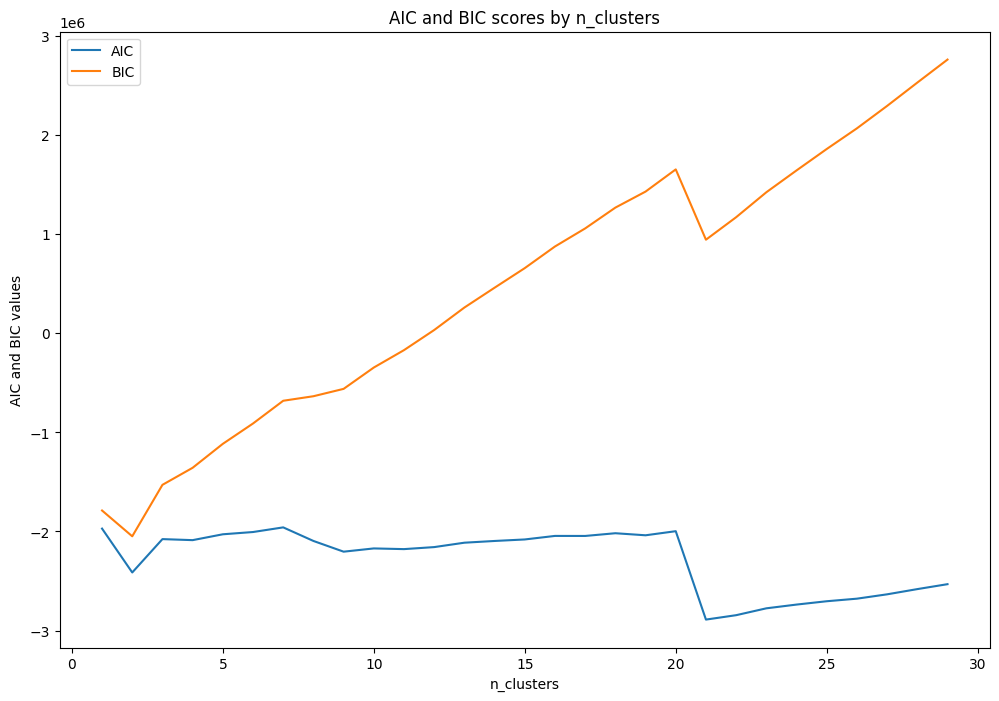

In [70]:
word_gm, word_prep = cluster(data, np.arange(1, 30, 1), preprocess)

Here we can see clear minimum at  in the AIC score. I have decided to use AIC as the primary crieterion, since BIC is too biased towards very small numbers of clusters for our clustering. I believe that not pruning the features is a better choice, since documents with these features will be more likely to be grouped together.

We can also try using ngrams as tokens, since they will likely include more information from the HTML parts and single-word documents, that seem to represent headers.

In [155]:
tfidf = TfidfVectorizer(min_df = 2, ngram_range = (3, 7), analyzer= 'char')
ngram_features = tfidf.fit_transform(data['Text_Value'])
ngram_features.shape

(2367, 143519)

The feature space is much, much bigger. We will need modify min_df and max_df values

In [35]:
tfidf = TfidfVectorizer(min_df = 0.005, max_df=0.99, ngram_range = (3, 7), analyzer= 'char')
ngram_features = tfidf.fit_transform(data['Text_Value'])
ngram_features.shape

(2367, 9021)

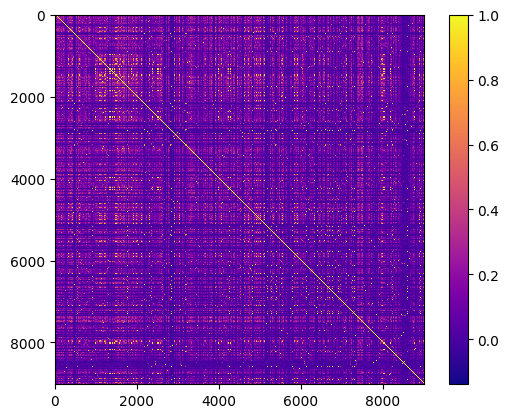

In [36]:
visualize_correlation(ngram_features.toarray())

These features are on average more correlated than words, but only a few are completely dependent.

Explained variance: 0.8730948842975133
Number of clusters with the lowest AIC score: 21


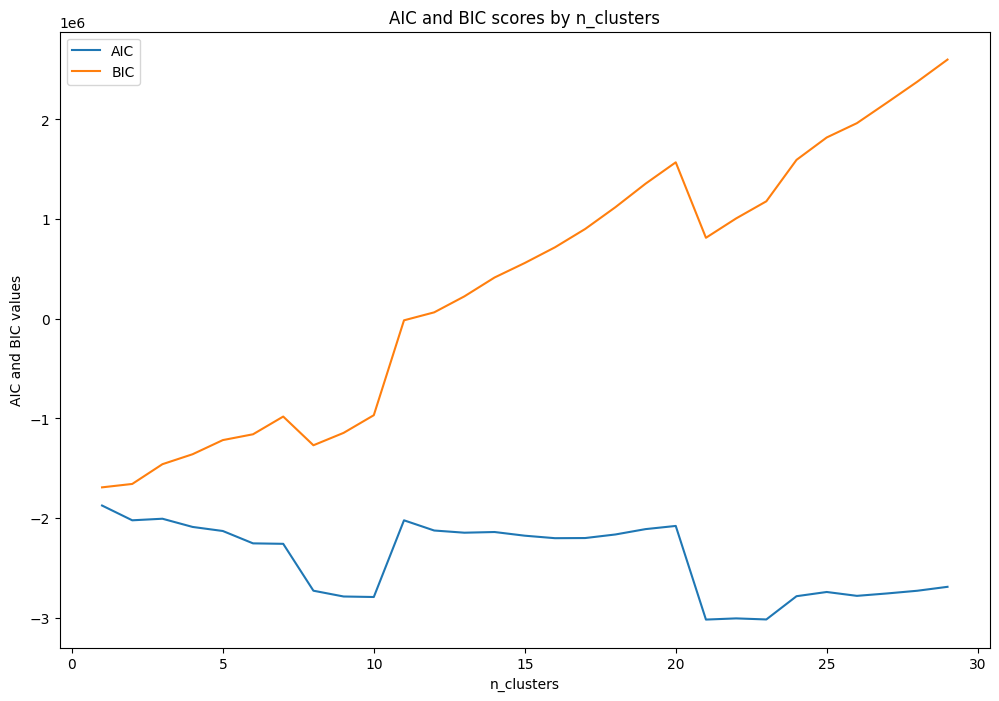

In [71]:
ngram_results, ngram_prep = cluster(data, np.arange(1, 30, 1), preprocess, min_df=0.005, max_df=0.99, ngrams=(3, 7), token_type='char')

In [58]:
def extract_clusters(data, model, preprocess):
    """
    Cluster the data using model and preprocess, and then return the resulting groups
    """
    preds = model.predict(preprocess.transform(data['Text_Value']))
    res = {}
    for i, pred in enumerate(preds):
        if pred not in res:
            res[pred] = []

        res[pred].append(data.iloc[i]['Object_Id'])

    return res

In [72]:
ngram_clusters = extract_clusters(data, ngram_results, ngram_prep)
word_clusters = extract_clusters(data, word_gm, word_prep)

In [66]:
# Inspect cluster sizes
for c in ngram_clusters.values():
    print(len(c))

359
103
989
60
128
53
55
46
42
20
90
63
29
69
49
38
80
27
15
23
29


In [73]:
for c in word_clusters.values():
    print(len(c))

827
1016
15
9
2
63
40
29
68
36
38
35
80
13
6
13
10
10
19
18
20


Both ngram and word-based clusterings produce quite unbalanced clusters, but the word clustering seems to be a lot worse in this sense.

In [92]:
data[data['Object_Id'].isin(ngram_clusters[6])]

,Object_Id,Text_Value
113,1354427,by Month
114,1354427,"Sales Amount, TotalProductCost"
131,1354663,DimProduct
142,1354708,ProductKey
147,1354725,EnglishProductName
...,...,...
2296,1360856,ProductLine
2336,1354427,"<p>The ""Sales Amount, TotalProductCost"" tile i..."
2337,1354427,<p>It showcases the total sales generated and ...
2340,1354663,"<p>The ""dimProduct"" table is a dimensional tab..."


In [93]:
data[data['Object_Id'].isin(ngram_clusters[15])]

,Object_Id,Text_Value
174,1354786,StartDate
273,1354899,Date the employee started work in the department.
364,1354899,StartDate
445,1354952,StartDate
455,1354925,StartDate
475,1354904,Edu.StartDate
487,1354926,Emp.StartDate
807,1355232,Date the component started being used in the a...
808,1355232,StartDate
809,1355233,Product cost start date.


In [95]:
for c in ngram_clusters:
    print(f"Cluster {c}")
    print(data[data['Object_Id'].isin(ngram_clusters[c])]['Text_Value'])
    print("\n\n\n")

Cluster 3
0       <p>Customer is an individual, group of individ...
1       <p>Kind of person who is very likely to buy th...
2       <p>Customer who are loyal to us and repeat the...
3       <p>The customers who order the product or serv...
4       <p>Those who only buy or use the offering beca...
                              ...                        
2364    <p>A string of characters that represents an e...
2365    <p>A string of digits that represents a teleph...
2366    <p>A string of characters that represents a co...
2367    <p>A string of characters that represents a da...
2368    <p>A string of characters that represents a cu...
Name: Text_Value, Length: 524, dtype: object




Cluster 4
25      <p>An employee is a person who has agreed to b...
36      <h3>Key Takeaways</h3><ul><li> An employee is ...
44      <p>See most relevant articles and guidelines p...
45      <p>This article is describing what doe's it me...
46      <p>Main differences between Employee and Contr...
   

The clusters created from ngram features look good, i.e. the data in the documents looks similar. There is one very large cluster, so there is room for improvements, but otherwise looks like a satisfactory clustering.

In [97]:
for c in word_clusters:
    print(f"Cluster {c}")
    print(data[data['Object_Id'].isin(word_clusters[c])]['Text_Value'])
    print("\n\n\n")

Cluster 3
0       <p>Customer is an individual, group of individ...
1       <p>Kind of person who is very likely to buy th...
2       <p>Customer who are loyal to us and repeat the...
3       <p>The customers who order the product or serv...
4       <p>Those who only buy or use the offering beca...
                              ...                        
2364    <p>A string of characters that represents an e...
2365    <p>A string of digits that represents a teleph...
2366    <p>A string of characters that represents a co...
2367    <p>A string of characters that represents a da...
2368    <p>A string of characters that represents a cu...
Name: Text_Value, Length: 1005, dtype: object




Cluster 8
81      <p>An object is not a KPI, but is KPI related....
89      {{EmbeddedText:Attribute:11289020:QsB9WkMOqXaW...
90      {{EmbeddedText:Attribute:11289032:cUlbNF1fP5wt...
113                                              by Month
114                        Sales Amount, TotalProductCost
  

The smaller clusters from word-based features also look good, but there are two big ones which could likely be split. Ngrams seem to be the better choice overall.

Explained variance: 0.6695745285364565
Number of clusters with the lowest AIC score: 29


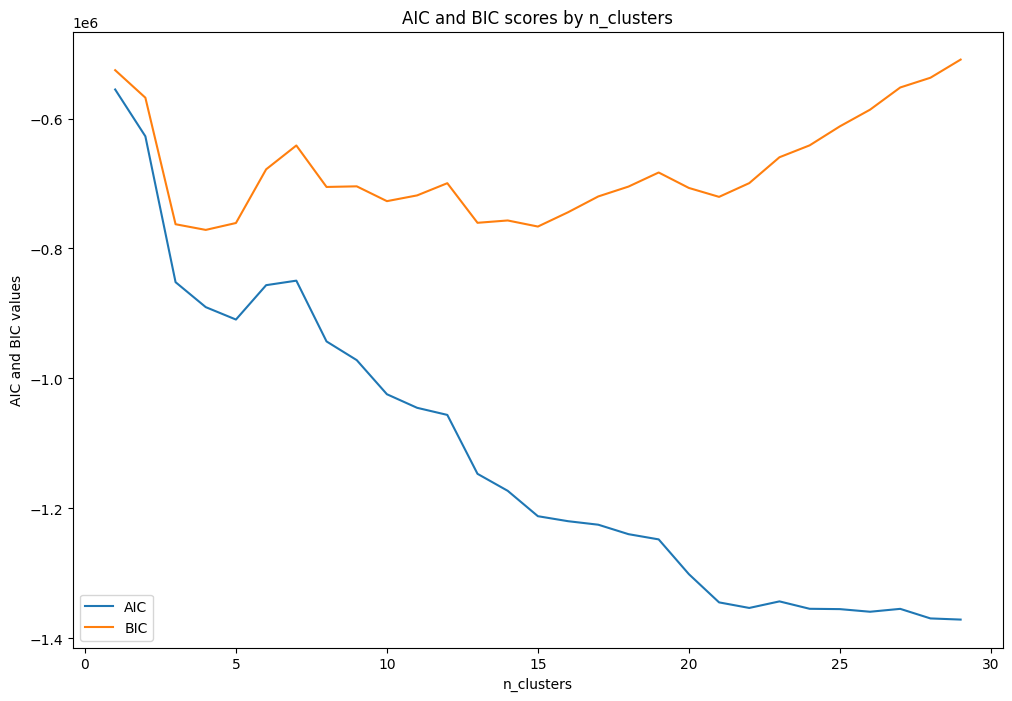

In [105]:
ngram_ext_results, ngram_ext_prep = cluster(data, np.arange(1, 30, 1), preprocess, min_df=0.005, max_df=0.99, ngrams=(3, 7), token_type='char', n_components=100)

In [109]:
ext_clusters = extract_clusters(data, ngram_ext_results, ngram_ext_prep)
for c in ext_clusters.values():
    print(len(c))

454
35
158
47
59
739
46
17
55
43
26
19
33
44
49
41
29
69
33
41
22
38
35
80
24
57
22
30
22


In [110]:
for c in ext_clusters:
    print(f"Cluster {c}")
    print(data[data['Object_Id'].isin(ext_clusters[c])]['Text_Value'])
    print("\n\n\n")

Cluster 3
0       <p>Customer is an individual, group of individ...
1       <p>Kind of person who is very likely to buy th...
2       <p>Customer who are loyal to us and repeat the...
3       <p>The customers who order the product or serv...
4       <p>Those who only buy or use the offering beca...
                              ...                        
2364    <p>A string of characters that represents an e...
2365    <p>A string of digits that represents a teleph...
2366    <p>A string of characters that represents a co...
2367    <p>A string of characters that represents a da...
2368    <p>A string of characters that represents a cu...
Name: Text_Value, Length: 652, dtype: object




Cluster 4
0       <p>Customer is an individual, group of individ...
6       <p style="line-height: 1.6;" data-mce-style="l...
10      <p style="line-height: 1.6;" data-mce-style="l...
11      <p style="line-height: 1.6;" data-mce-style="l...
12      <p style="line-height: 1.6;" data-mce-style="l...
13 

In [116]:
for x in data[data['Object_Id'].isin(ext_clusters[3])]['Text_Value']:
    print(x)

<p>Customer is an individual, group of individuals or an organization who receive or may receive goods, services, products or ideas from our company in return of value which can be money or anything of equivalent value.</p>
<p>Kind of person who is very likely to buy the product or service offered by the business. Potential customers present an opportunity for the business and after qualification can convert into a quote stage and eventually result in an order or a sale.</p>
<p>Customer who are loyal to us and repeat the purchases irrespective of minor changes in parameters like price, quantity etc. </p><p>Customer who buys the more than once in our shop in one year.</p>
<p>The customers who order the product or service for the first time. Such customers can be switching from a competitor brand or may be new entrant into the market.</p>
<p>Those who only buy or use the offering because it was on discount or offered a cashback. These people are more likely to switch brands easily if pri

Reducing the amount of components yielded much more decisive results when looking at the criterion values. Some cluster could be merged, and the two big ones divided as before.

In [122]:
def describe_clustering(data, model, prep):
    """
    Cluster the data using the given model and preprocess. Then print
    number of elements in the clusters, followed by elements inside each cluster.
    """
    clusters = extract_clusters(data, model, prep)

    for c in clusters:
        print(len(clusters[c]))

    for c in clusters:
        print(f"Cluster {c}")
        print(data[data['Object_Id'].isin(clusters[c])]['Text_Value'])
        print("\n\n\n")

Explained variance: 0.8730948842975133
Number of clusters with the lowest AIC score: 21


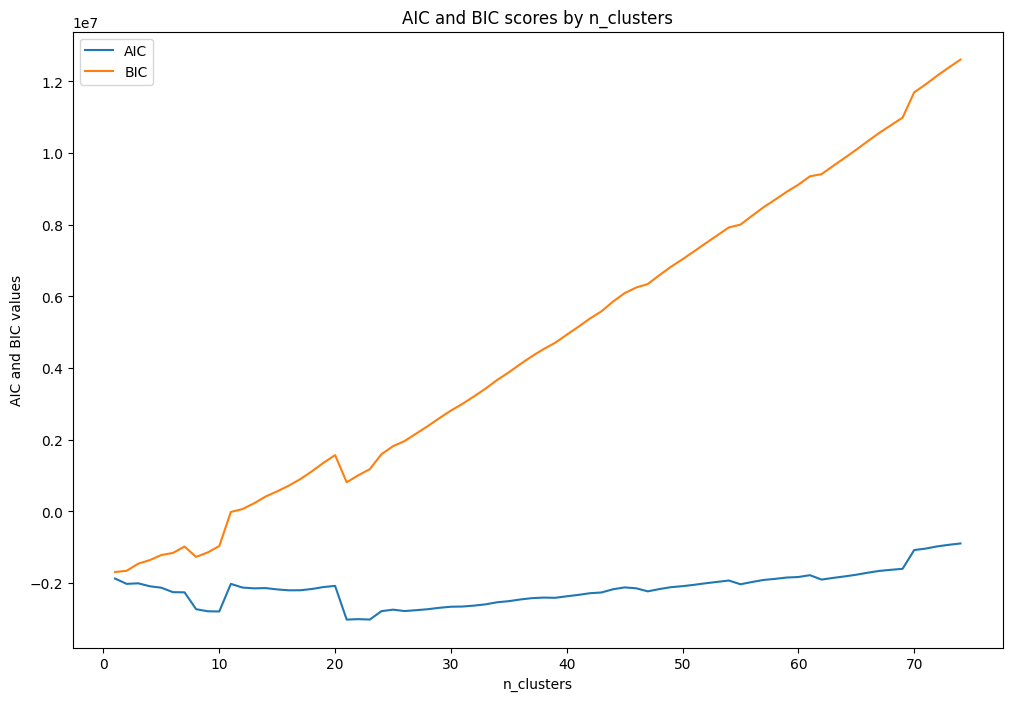

(GaussianMixture(n_components=21, random_state=42),
 Pipeline(steps=[('tfidf',
                  TfidfVectorizer(analyzer='char', max_df=0.99, min_df=0.005,
                                  ngram_range=(3, 7))),
                 ('dense',
                  FunctionTransformer(func=<function preprocess.<locals>.<lambda> at 0x000001C4A5ACF560>)),
                 ('pca', PCA(n_components=250, random_state=42))]))

In [118]:
cluster(data, np.arange(1,75), preprocess,  min_df=0.005, max_df=0.99, ngrams=(3, 7), token_type='char', n_components=250)

Increasing the number of clusters for `n_components=200` did not change the outcome

Explained variance: 0.6695745285364565
Number of clusters with the lowest AIC score: 52


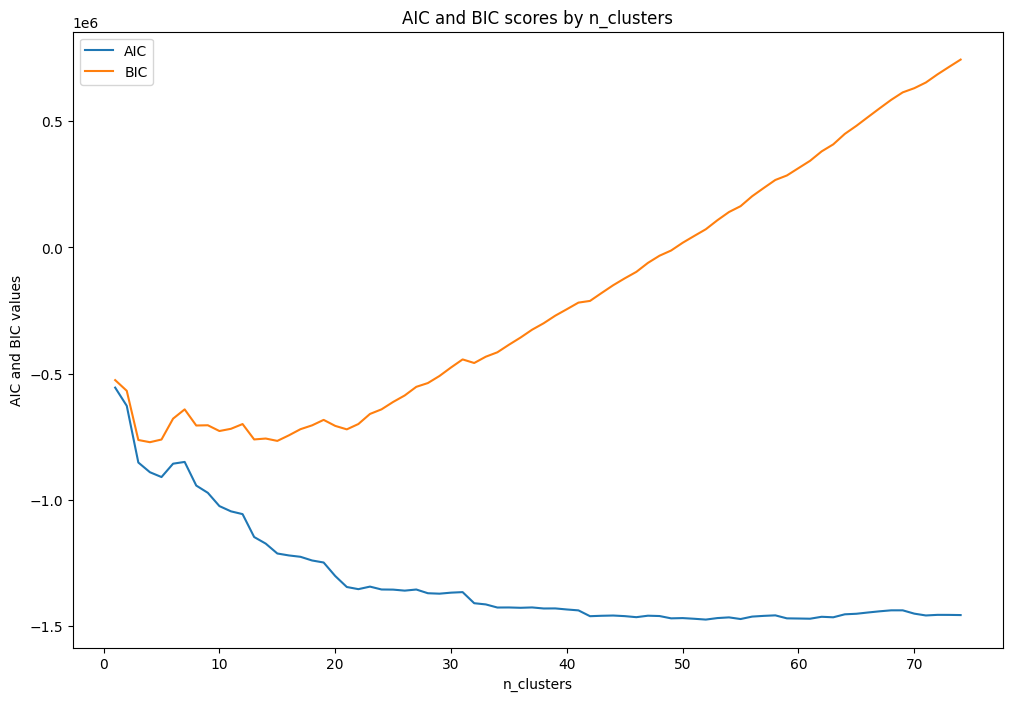

In [120]:
high_c_result, high_c_prep = cluster(data, np.arange(1,75), preprocess,  min_df=0.005, max_df=0.99, ngrams=(3, 7), token_type='char', n_components=100)

In [123]:
describe_clustering(data, high_c_result, high_c_prep)

324
30
16
35
21
25
500
21
83
39
17
20
49
51
40
65
21
70
22
20
20
19
17
31
20
13
24
43
28
23
39
41
29
28
69
27
41
22
38
35
80
15
14
12
24
14
42
22
30
21
15
2
Cluster 3
0       <p>Customer is an individual, group of individ...
1       <p>Kind of person who is very likely to buy th...
2       <p>Customer who are loyal to us and repeat the...
3       <p>The customers who order the product or serv...
4       <p>Those who only buy or use the offering beca...
                              ...                        
2359    <p>The "Overview" page in the Profit Analysis ...
2360    <p>AdventureWorks is a SQL Server database tha...
2361    <ul><li>Source: This is a pre-packaged databas...
2362    <ul> <li>Source: This schema is managed by the...
2363    <p>HumanResources is a schema under the Advent...
Name: Text_Value, Length: 496, dtype: object




Cluster 4
0       <p>Customer is an individual, group of individ...
6       <p style="line-height: 1.6;" data-mce-style="l...
10      <p style="li

When we allow for more clusters and use a smaller number of components, the optimum seems to be at around 52 clusters. We get quite granular clusters, and perhaps some of them could be merged or split, but nearly all of them do have documents that are of similar nature. In the end it depends on how granular we want the resulting clusters to be. Since the data is quite varied, I think that having a high number of clusters is something we should expect, and from that angle I'd say that this is the best clustering so far.

# Feature Engineering approach

Let's try to parse the HTML formatted text to extract features, which will hopefully improve the clustering. Below is a sample parser from the Python docs, which will serve as a basis

In [127]:
from html.parser import HTMLParser
from html.entities import name2codepoint

class ExampleHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print("Start tag:", tag)
        for attr in attrs:
            print("     attr:", attr)

    def handle_endtag(self, tag):
        print("End tag  :", tag)

    def handle_data(self, data):
        print("Data     :", data)

    def handle_comment(self, data):
        print("Comment  :", data)

    def handle_entityref(self, name):
        c = chr(name2codepoint[name])
        print("Named ent:", c)

    def handle_charref(self, name):
        if name.startswith('x'):
            c = chr(int(name[1:], 16))
        else:
            c = chr(int(name))
        print("Num ent  :", c)

    def handle_decl(self, data):
        print("Decl     :", data)

parser = ExampleHTMLParser()

In [32]:
parser.feed(data['Text_Value'].iloc[54])

Start tag: h3
Data     : What is an exempt employee? 
End tag  : h3
Start tag: p
Data     : An exempt employee meets certain thresholds that disqualify them from overtime benefits covered by the Fair Labor Standards Act (FLSA). The most common type of exempt employee is a salaried (non-hourly) worker receiving at least $684 per week. Certain professions, such as computer workers, have lower thresholds. Other types of employees, such as teachers and medical professionals, are not subject to these salary thresholds.
End tag  : p
Start tag: h3
Data     : What is a 1099 employee? 
End tag  : h3
Start tag: p
Data     : A 1099 worker isn't an employee at all; they're an independent contractor. Rather than filling out a W-4 and using a W-2 for tax returns, independent contractors fill out a W-9 and use a 1099 form for tax returns.
End tag  : p
Start tag: h3
Data     : What is a non-exempt employee? 
End tag  : h3
Start tag: p
Data     : A non-exempt employee must receive overtime pay under ce

In [159]:
import re
from collections import namedtuple
# Customized parser that saves information about tags, data and attributes in a dictionary

"""
A TagRecord holds a HTML tag and its attributes. The attributes are saved as a dictiornary
{
    attr_name : value | sub_dictionary
    {
        attr : value
    }
}

"""
TagRecord = namedtuple('TagRecord', ['tag', 'attributes'])

class AggregatingHTMLParser(HTMLParser):
    def __init__(self, *, convert_charrefs: bool = True) -> None:
        super().__init__(convert_charrefs=convert_charrefs)
        # Holds the information about processed documents
        self.docs = {}
        self.current_doc = 0

    def process_doc(self, data : pd.Series, idx ):
        self.current_doc = idx
        self.docs[self.current_doc] = {}
        # Save the current document index, so that other functions have access to it
        self.init_fields(self.current_doc)
        self.feed(data)

        return self.docs[self.current_doc]

    def init_fields(self, doc : str):
        """
        Initializes fields of data for the given doc in the self.docs dict
        """
        fields = ['tags', 'data', 'comments']
        for f in fields:
            self.docs[doc][f] = []
        
    def extract_attr_val_pairs(self, value : str):
        match = re.findall(r'([^;:,*()\[\]<>\s]+):\s*([^;]+)', value)
        # If there are no matches, there aren't any values of type
        # something: val;
        # so return the whole string
        if len(match) == 0:
            return value
        
        return {name : val for name, val in match }

    def extract_attr_vals(self, value : str):
        """
        Extracts 
        """
        return [item for item in re.split(r'[;:,*()\[\]<>\s]+', value) if item]
        
    def handle_starttag(self, tag : str, attrs):
        # print("Start tag:", tag)

        attributes = {}
        for name, val in attrs:
            attributes[name] = self.extract_attr_val_pairs(val)

        self.docs[self.current_doc]['tags'].append(TagRecord(tag, attributes))

    def handle_endtag(self, tag):
        self.docs[self.current_doc]['tags'].append(TagRecord(tag, {}))

    def handle_data(self, data):
        self.docs[self.current_doc]['data'].append(data)

    def handle_comment(self, data):
        self.docs[self.current_doc]['comments'].append(data)

    # Seems to automatically translate to the character it represents
    # def handle_entityref(self, name):
    #     c = chr(name2codepoint[name])
    #     print("Named ent:", c)
        
    # Special characters, will be ignored
    # def handle_charref(self, name):
    #     if name.startswith('x'):
    #         c = chr(int(name[1:], 16))
    #     else:
    #         c = chr(int(name))
    #     print("Num ent  :", c)

    # HTML declarations not present in the data
    # def handle_decl(self, data):
    #     print("Decl     :", data)

In [130]:
my_parser = AggregatingHTMLParser()

my_parser.process_doc(data.iloc[54], 54)
my_parser.docs

{1343213: {'tags': [TagRecord(tag='h3', attributes={}),
   TagRecord(tag='h3', attributes={}),
   TagRecord(tag='p', attributes={}),
   TagRecord(tag='p', attributes={}),
   TagRecord(tag='h3', attributes={}),
   TagRecord(tag='h3', attributes={}),
   TagRecord(tag='p', attributes={}),
   TagRecord(tag='p', attributes={}),
   TagRecord(tag='h3', attributes={}),
   TagRecord(tag='h3', attributes={}),
   TagRecord(tag='p', attributes={}),
   TagRecord(tag='p', attributes={})],
  'data': ['What is an exempt employee? ',
   'An exempt employee meets certain thresholds that disqualify them from overtime benefits covered by the Fair Labor Standards Act (FLSA). The most common type of exempt employee is a salaried (non-hourly) worker receiving at least $684 per week. Certain professions, such as computer workers, have lower thresholds. Other types of employees, such as teachers and medical professionals, are not subject to these salary thresholds.',
   'What is a 1099 employee? ',
   "A 1099 

In [164]:
from numpy import ndarray
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler

class DocProcessor(BaseEstimator, TransformerMixin):
    """
    Extracts data fields from documents, adds a column containing 
    the length of a document and performs PCA.
    """
    def __init__(self, **tfidf_params) -> None:
        self.html_parser = AggregatingHTMLParser()
        self.tfidf = TfidfVectorizer(**tfidf_params)
        self.scaler = StandardScaler()

    def fit_transform(self, X, y = None) -> ndarray:
        res = []
        lengths = []
        for idx, doc in enumerate(X):
            processed = process_doc_data(self.html_parser.process_doc(doc, idx))
            lengths.append(len(processed))
            res.append(processed)

        res = self.tfidf.fit_transform(res).toarray()
        lengths = self.scaler.fit_transform(np.asarray(lengths).reshape(-1, 1))

        return np.concatenate([res, lengths], axis=1)
    
    def transform(self, X, y = None):
        res = []
        lengths = []
        for idx, doc in enumerate(X):
            processed = process_doc_data(self.html_parser.process_doc(doc, idx))
            lengths.append(len(processed))
            res.append(processed)

        res = self.tfidf.transform(res).toarray()
        lengths = self.scaler.transform(np.asarray(lengths).reshape(-1, 1))

        return np.concatenate([res, lengths], axis=1)
    
    def fit(self, X, y = None):
        res = []
        lengths = []
        for idx, doc in enumerate(X):
            processed = process_doc_data(self.html_parser.process_doc(doc, idx))
            lengths.append(len(processed))
            res.append(processed)

        self.tfidf.fit(res)
        self.scaler.fit(np.asarray(lengths).reshape(-1, 1))


def process_doc_data(doc):
    """
    Concatenate the data strings in doc['data'] list into one
    """
    return ' '.join(doc['data'])


def preprocess_data_only(data : pd.DataFrame, min_df = 0.005, max_df = 0.99, n_components=100, ngrams = (3, 7), token_type='char'):
    pipe = Pipeline([
        ('data_only_tfidf_and_length', DocProcessor(min_df=min_df, max_df=max_df, ngram_range=ngrams, analyzer=token_type)),
        ('pca', PCA(n_components=n_components, random_state=42))
    ])

    features = pipe.fit_transform(data)

    return features, pipe

Number of clusters with the lowest AIC score: 55


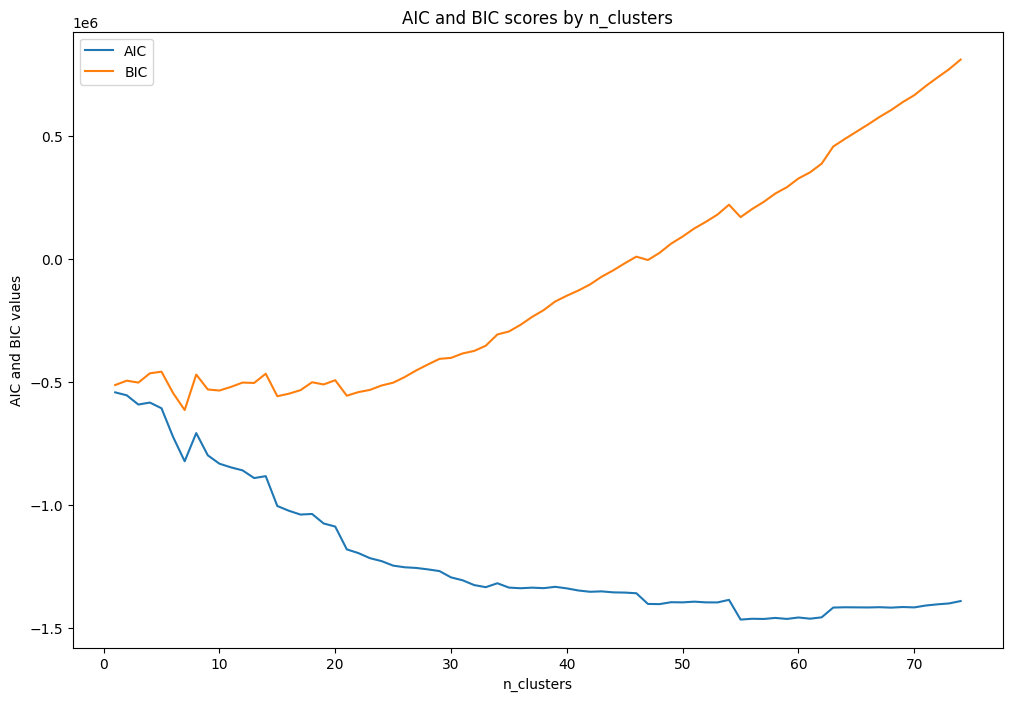

In [165]:
data_only_result, data_only_prep = cluster(data, np.arange(1, 75), preprocess_data_only, min_df=0.005, max_df=0.99, ngrams=(3,7), n_components=100, token_type='char')

In [166]:
describe_clustering(data, data_only_result, data_only_prep)

53
186
89
24
21
29
13
9
25
6
5
1
23
61
25
426
16
236
20
53
44
26
22
12
61
26
20
20
19
17
32
13
42
44
28
38
48
29
35
69
48
22
9
38
35
80
14
13
24
34
23
29
21
10
1
Cluster 3
0       <p>Customer is an individual, group of individ...
1       <p>Kind of person who is very likely to buy th...
5       <p>Those who were once buyer of one business a...
6       <p style="line-height: 1.6;" data-mce-style="l...
7       <p>A purchase order is a business document tha...
                              ...                        
2359    <p>The "Overview" page in the Profit Analysis ...
2360    <p>AdventureWorks is a SQL Server database tha...
2361    <ul><li>Source: This is a pre-packaged databas...
2362    <ul> <li>Source: This schema is managed by the...
2363    <p>HumanResources is a schema under the Advent...
Name: Text_Value, Length: 105, dtype: object




Cluster 27
2       <p>Customer who are loyal to us and repeat the...
3       <p>The customers who order the product or serv...
4       <p>Tho

Number of clusters with the lowest AIC score: 27


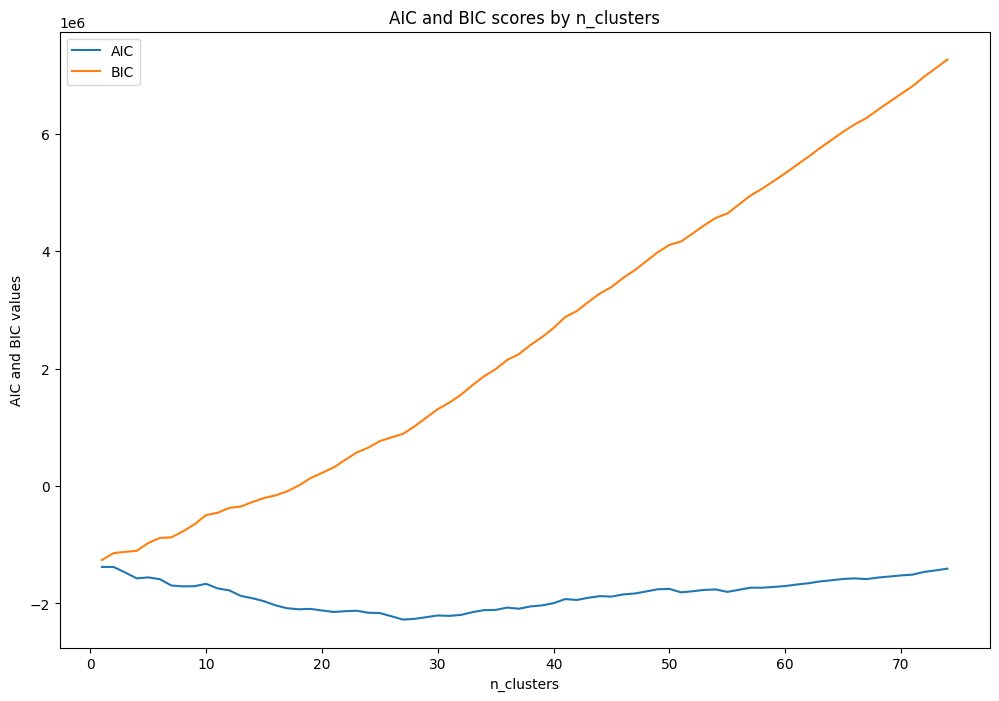

166
40
1124
14
6
5
2
78
68
127
53
55
42
17
49
44
28
50
29
69
62
12
38
80
57
23
29
Cluster 5
0       <p>Customer is an individual, group of individ...
1       <p>Kind of person who is very likely to buy th...
2       <p>Customer who are loyal to us and repeat the...
3       <p>The customers who order the product or serv...
4       <p>Those who only buy or use the offering beca...
                              ...                        
2364    <p>A string of characters that represents an e...
2365    <p>A string of digits that represents a teleph...
2366    <p>A string of characters that represents a co...
2367    <p>A string of characters that represents a da...
2368    <p>A string of characters that represents a cu...
Name: Text_Value, Length: 304, dtype: object




Cluster 4
6       <p style="line-height: 1.6;" data-mce-style="l...
7       <p>A purchase order is a business document tha...
9       <p>Sales growth is a business term that indica...
10      <p style="line-height: 1.6;" 

In [167]:
data_only_result, data_only_prep = cluster(data, np.arange(1, 75), preprocess_data_only, min_df=0.005, max_df=0.99, ngrams=(3,7), n_components=200, token_type='char')
describe_clustering(data, data_only_result, data_only_prep)

Number of clusters with the lowest AIC score: 41


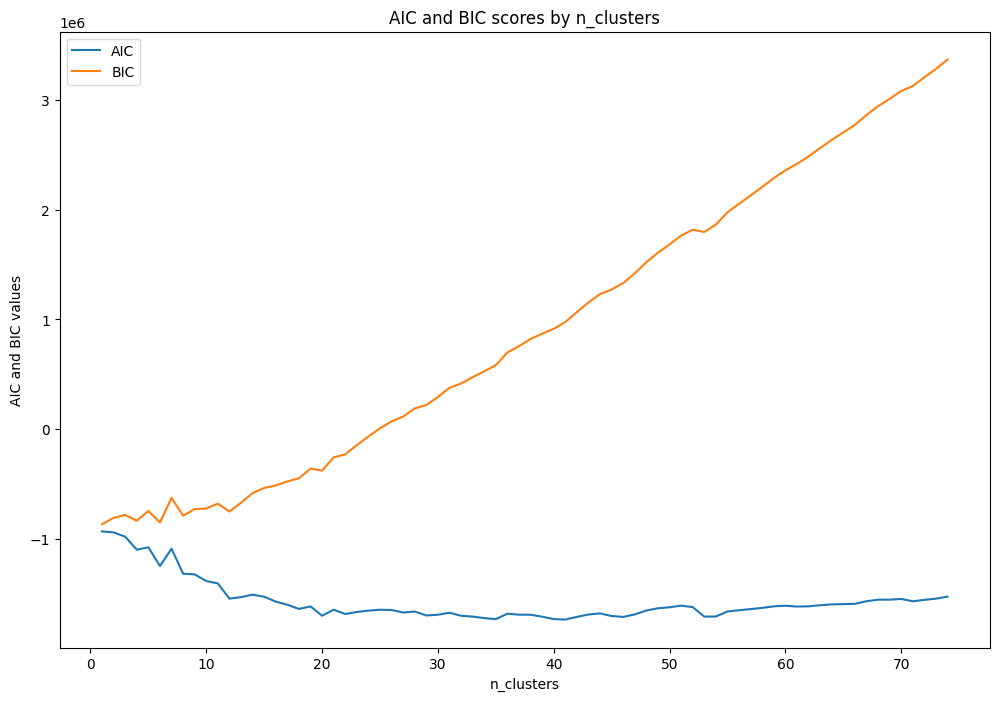

64
18
260
40
9
10
11
2
125
877
25
54
55
41
13
20
19
34
13
22
33
13
36
29
34
69
47
22
38
35
80
14
14
19
42
20
21
21
30
27
11
Cluster 3
0       <p>Customer is an individual, group of individ...
1       <p>Kind of person who is very likely to buy th...
2       <p>Customer who are loyal to us and repeat the...
3       <p>The customers who order the product or serv...
4       <p>Those who only buy or use the offering beca...
                              ...                        
2361    <ul><li>Source: This is a pre-packaged databas...
2362    <ul> <li>Source: This schema is managed by the...
2363    <p>HumanResources is a schema under the Advent...
2364    <p>A string of characters that represents an e...
2367    <p>A string of characters that represents a da...
Name: Text_Value, Length: 116, dtype: object




Cluster 8
6       <p style="line-height: 1.6;" data-mce-style="l...
7       <p>A purchase order is a business document tha...
10      <p style="line-height: 1.6;" data-mce-style="

In [168]:
data_only_result, data_only_prep = cluster(data, np.arange(1, 75), preprocess_data_only, min_df=0.005, max_df=0.99, ngrams=(3,7), n_components=150, token_type='char')
describe_clustering(data, data_only_result, data_only_prep)

We have extracted document data and length, and played with the number of compnents. The higher numbers tend to still make a few huge components. The previous best (100 components) still gives decisive results w.r.t AIC, but now the cluster quality does not seem to be that great. We have a few very small clusters, and the data inside some of them does not seem to be that homogenous.
Perhaps this is influenced by adding the document length to the features. Let's try one more time without it.

In [178]:
class DocProcessorNoLength(BaseEstimator, TransformerMixin):
    """
    Extracts data fields from documents, and creates tfidf features based on that transformation
    """
    def __init__(self, **tfidf_params) -> None:
        self.html_parser = AggregatingHTMLParser()
        self.tfidf = TfidfVectorizer(**tfidf_params)


    def fit_transform(self, X, y = None) -> ndarray:
        res = []
        for idx, doc in enumerate(X):
            processed = process_doc_data(self.html_parser.process_doc(doc, idx))
            res.append(processed)

        return self.tfidf.fit_transform(res).toarray()
    
    def transform(self, X, y = None):
        res = []

        for idx, doc in enumerate(X):
            processed = process_doc_data(self.html_parser.process_doc(doc, idx))
            res.append(processed)

        return self.tfidf.transform(res).toarray()

    
    def fit(self, X, y = None):
        res = []

        for idx, doc in enumerate(X):
            processed = process_doc_data(self.html_parser.process_doc(doc, idx))
            res.append(processed)

        self.tfidf.fit(res)

In [171]:
def preprocess_data_only(data : pd.DataFrame, min_df = 0.005, max_df = 0.99, n_components=100, ngrams = (3, 7), token_type='char'):
    """
    Create a pipeline that extracts the data fields from the HTML data, creates tf-idf vectors, and finally applies PCA.

    Returns a tuple (features, pipe), where features are the extracted features, and pipe is a sklearn.pipe.Pipeline() instance
    """
    pipe = Pipeline([
        ('data_only_tfidf', DocProcessorNoLength(min_df=min_df, max_df=max_df, ngram_range=ngrams, analyzer=token_type)),
        ('pca', PCA(n_components=n_components, random_state=42))
    ])

    features = pipe.fit_transform(data)

    return features, pipe

Number of clusters with the lowest AIC score: 37


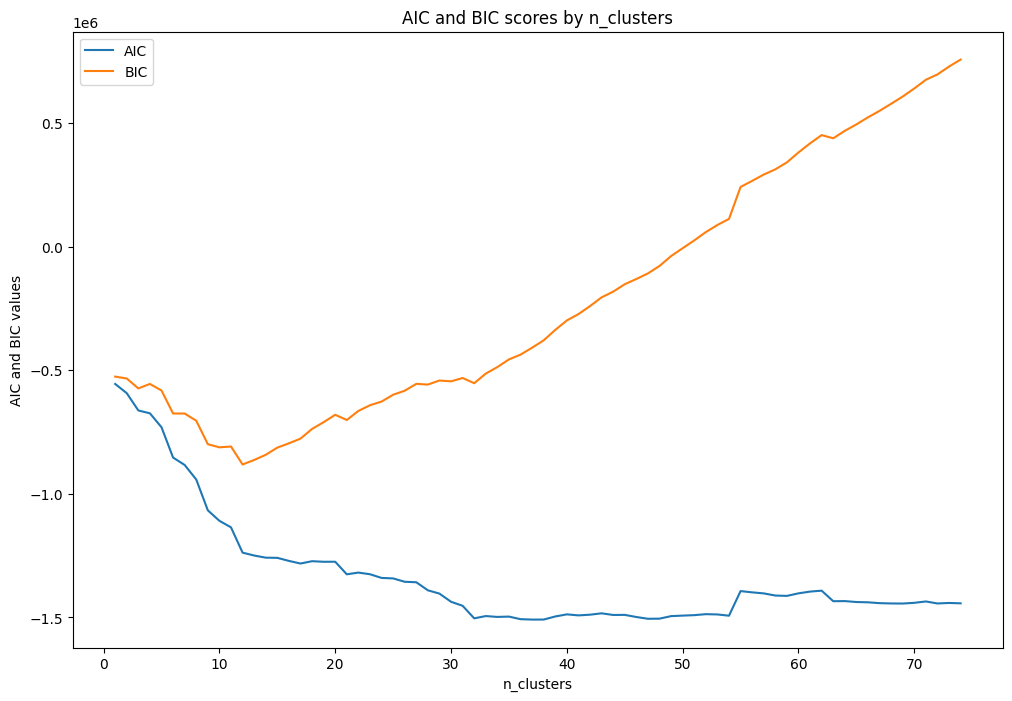

295
46
84
526
36
32
25
184
16
26
53
55
50
40
109
22
20
34
19
20
19
45
55
44
29
35
69
51
38
35
80
14
62
22
43
18
16
Cluster 15
0       <p>Customer is an individual, group of individ...
1       <p>Kind of person who is very likely to buy th...
4       <p>Those who only buy or use the offering beca...
5       <p>Those who were once buyer of one business a...
6       <p style="line-height: 1.6;" data-mce-style="l...
                              ...                        
2362    <ul> <li>Source: This schema is managed by the...
2363    <p>HumanResources is a schema under the Advent...
2365    <p>A string of digits that represents a teleph...
2366    <p>A string of characters that represents a co...
2367    <p>A string of characters that represents a da...
Name: Text_Value, Length: 443, dtype: object




Cluster 4
0       <p>Customer is an individual, group of individ...
2       <p>Customer who are loyal to us and repeat the...
3       <p>The customers who order the product or serv...
6  

In [172]:
no_length_res, no_length_prep = cluster(data, np.arange(1, 75), preprocess_data_only, min_df=0.005, max_df=0.99, ngrams=(3,7), n_components=100, token_type='char')
describe_clustering(data, no_length_res, no_length_prep)

After removing the length, we have a reasonable amount of clusters. They certainly aren't perfect but the data inside them is quite related, and we only have 1 outlier with many documents. Focusing on data only means that the HTML tags will be ignored. This may or may not be a desirable thing, depending on our goals. If we want to include tags, we can use the last clustering from the previous part (the one with 100 components), otherwise we can use this one. I have submitted the version with data only, and 100 components.

In [177]:
import json

clusters = extract_clusters(data, no_length_res, no_length_prep)
print(clusters)
# Keys have to be converted to int
clusters = {str(k) : [str(v_i) for v_i in v]  for k, v in clusters.items()}
jstring = json.dumps(clusters, indent='\t')

with open('clusters.json', 'w') as f:
    f.write(jstring)

{15: [1343152, 1343153, 1343156, 1343157, 1343176, 1343177, 1343170, 1343171, 1343172, 1343173, 1343174, 1343175, 1343164, 1343165, 1343167, 1343168, 1343159, 1343161, 1343160, 1343169, 1343163, 1343180, 1343166, 1343168, 1343161, 1343160, 1343162, 1343203, 1343211, 1343215, 1343216, 1343204, 1343212, 1343215, 1343218, 1343228, 1351401, 1351404, 1351413, 1351405, 1351407, 1351408, 1351409, 1351410, 1351411, 1343197, 1343198, 1343170, 1351425, 1351425, 1351426, 1351426, 1351427, 1354412, 1354413, 1354416, 1354417, 1354423, 1354426, 1354434, 1354660, 1354662, 1354668, 1354773, 1354681, 1354792, 1354799, 1354797, 1354801, 1354803, 1354880, 1354867, 1354887, 1354888, 1354896, 1354870, 1354818, 1354815, 1354823, 1354825, 1354811, 1354804, 1354805, 1354867, 1354919, 1354979, 1355001, 1355002, 1355003, 1355005, 1355006, 1355041, 1354995, 1355009, 1355052, 1355015, 1355010, 1355065, 1355066, 1355073, 1355075, 1355081, 1355117, 1355088, 1355090, 1355093, 1355096, 1355099, 1355125, 1355136, 1355

In the future, we could use a transformer model, such as BERT, to create embeddings and use them as features instead of tf-idf. However, we would like to have more data for better fine-tuning and better hardware than my laptop.